### Student Information
Name: Retnani Latifah

Student ID: 111062860

GitHub ID: 127463521

Kaggle name: retnanilatifah / matcha (competition name)

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

### Begin Assignment Here

### FIRST PART : TAKE HOME EXERCISE

#### Exercise 1
Plot word frequency for Top 30 words in both train and test dataset.

In [1]:
import pandas as pd
import os.path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

base_dir = "/Users/retna/DMLab2/DM2023-Lab2-Master/"
data_dir = "/Users/retna/data/"

In [2]:
## load a pickle file
train_df = pd.read_pickle(os.path.join(base_dir, "train_df.pkl"))
test_df = pd.read_pickle(os.path.join(base_dir, "test_df.pkl"))

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
tr_count = count_vect.fit_transform(train_df.text) 

In [5]:
#get the vector for train data
tr_vw = pd.DataFrame(tr_count.toarray(), columns=count_vect.get_feature_names_out()) 
tr_vw.head()

,00,000,00pm,00tiffanyr,01,02,03,0303,034,04,...,zoolander,zumba,óg,деньги,الخفجي,اليوم_الوطني,ध_य,य_ब,सत,アニメ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#sort the column based on the frequencies of each terms
trSort = tr_vw[tr_vw.sum().sort_values(ascending=False).index]
trSort['Doc']= ["doc_"+ str(i+1) for i in list(trSort.index)]
trSort = trSort.set_index(trSort['Doc'])

### Plot for Training Data

[Text(0.5, 1.0, 'HeatMap of Top 30 Frequency of Training Data in 30 Docs')]

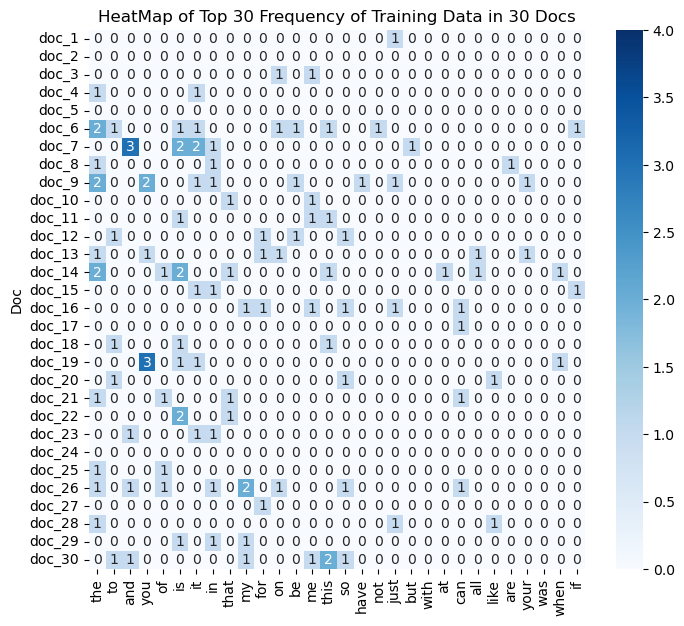

In [7]:
plt.subplots(figsize=(8, 7))
sns.heatmap(trSort.iloc[:30,:30],              
    cmap="Blues",
    vmin=0, vmax=4, annot=True).set(title='HeatMap of Top 30 Frequency of Training Data in 30 Docs')

In [8]:
tr_fr = trSort.sum().to_frame().reset_index()
tr_fr = tr_fr.set_axis(['term', 'freq'], axis=1)

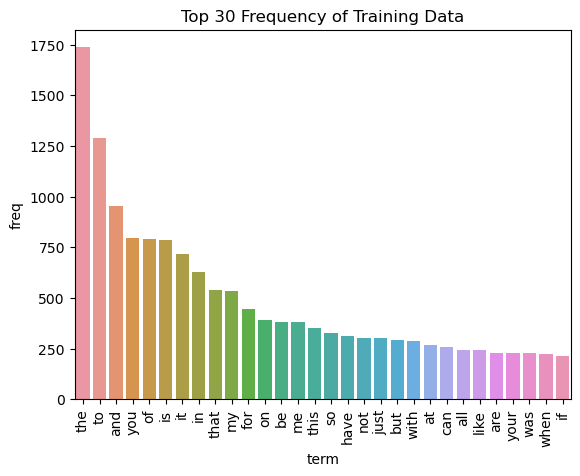

In [9]:
g = sns.barplot(x=tr_fr.term[:30], 
            y=tr_fr.freq[:30])
g.set(title='Top 30 Frequency of Training Data');
g.set_xticklabels(tr_fr.term[:30], rotation = 90);

In [10]:
#get the vector for test data
ts_count = count_vect.fit_transform(test_df.text)
ts_vw = pd.DataFrame(ts_count.toarray(), columns=count_vect.get_feature_names_out()) 
ts_vw.head()

,10,11,11am,12,12s,138,158,15gets20,16,17,...,young,your,youraffair,yourself,youthful,yungdoujin,zen,zeroalcohol,zubairsabirpti,الخفجي
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#sort the column based on the frequencies of each terms
tsSort = ts_vw[ts_vw.sum().sort_values(ascending=False).index]
tsSort['Doc']= ["doc_"+ str(i+1) for i in list(tsSort.index)]
tsSort = tsSort.set_index(tsSort['Doc'])

### Plot for Test Data

[Text(0.5, 1.0, 'HeatMap of Top 30 Frequency of Test Data in 30 Docs')]

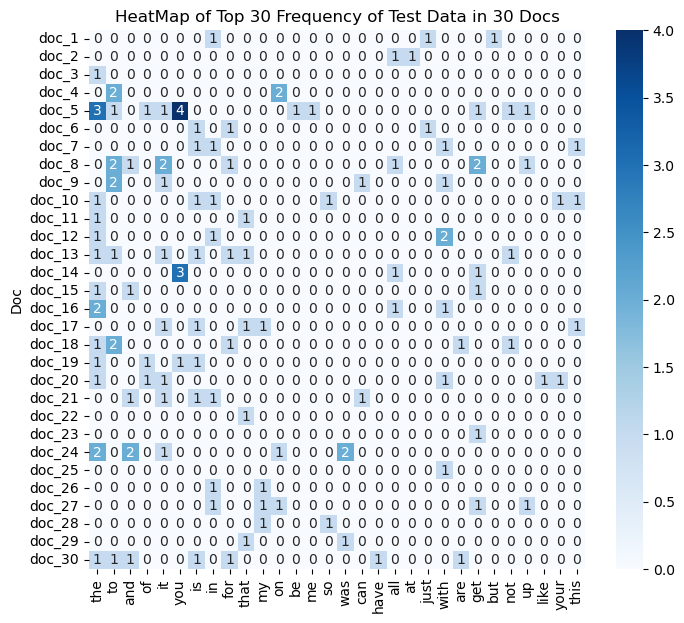

In [12]:
plt.subplots(figsize=(8, 7))
sns.heatmap(tsSort.iloc[:30,:30],              
    cmap="Blues",
    vmin=0, vmax=4, annot=True).set(title='HeatMap of Top 30 Frequency of Test Data in 30 Docs')

In [13]:
ts_fr = tsSort.sum().to_frame().reset_index()
ts_fr = ts_fr.set_axis(['term', 'freq'], axis=1)

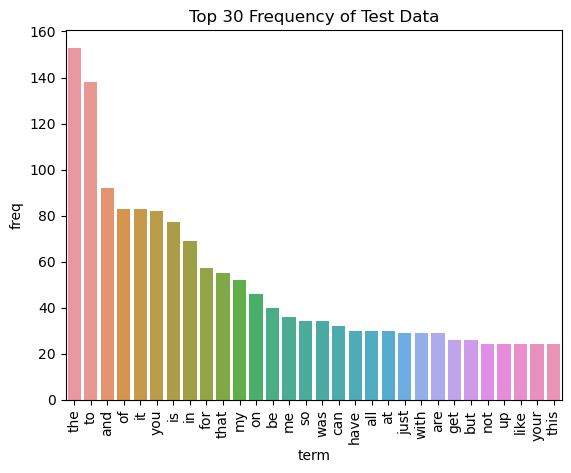

In [14]:
g = sns.barplot(x=ts_fr.term[:30], 
            y=ts_fr.freq[:30])
g.set(title='Top 30 Frequency of Test Data');
g.set_xticklabels(ts_fr.term[:30], rotation = 90);

#### Exercise 2 

Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

#vectTfidf = TfidfVectorizer()

In [16]:
# build analyzers 
tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
tfidf_1000.fit(train_df['text'])

train_data_tfidf_features_1000 = tfidf_1000.transform(train_df['text'])

## check dimension
train_data_tfidf_features_1000.shape

(3613, 1000)

In [17]:
feature_names_1000 = tfidf_1000.get_feature_names_out()
feature_names_1000[100:110] #get the token for 100:110

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

In [18]:
print("\nTrain data TFIDF features:")
print(pd.DataFrame(train_data_tfidf_features_1000.toarray(),
                   columns = tfidf_1000.get_feature_names_out()))



Train data TFIDF features:
             !         #    $    %         &         '   'd  'll   'm  're  \
0     0.000000  0.000000  0.0  0.0  0.000000  0.195422  0.0  0.0  0.0  0.0   
1     0.000000  0.279391  0.0  0.0  0.416536  0.000000  0.0  0.0  0.0  0.0   
2     0.000000  0.109400  0.0  0.0  0.000000  0.111765  0.0  0.0  0.0  0.0   
3     0.000000  0.159032  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
4     0.217097  0.000000  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
...        ...       ...  ...  ...       ...       ...  ...  ...  ...  ...   
3608  0.000000  0.184003  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
3609  0.000000  0.214628  0.0  0.0  0.000000  0.219268  0.0  0.0  0.0  0.0   
3610  0.000000  0.134964  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
3611  0.000000  0.000000  0.0  0.0  0.217804  0.000000  0.0  0.0  0.0  0.0   
3612  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   

      ...    ’    “    ”   ❤️    😂 

#### Exercise 3
Can you interpret the results? What do they mean?
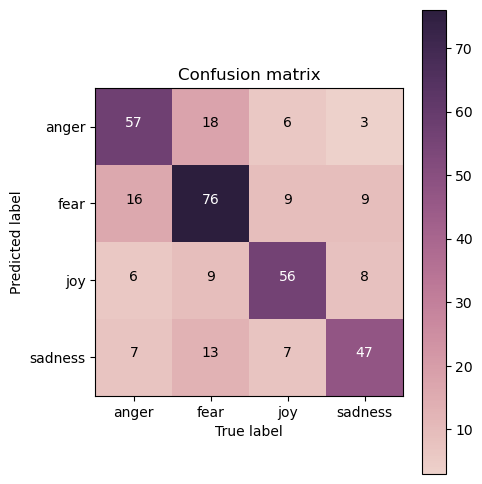

Answer : 


The training accuracy of the model is high at 0.99, but the testing accuracy is lower at 0.68, indicating an overfitting. Despite this, the model performs decently, particularly in predicting "joy," where both precision and recall exceed 70%. For the emotion "sadness," precision stands at 70%, but recall is only 64%, leading to a lower f1-score/accuracy. It is possibly due to misclassifications, particularly with "fear". Additionally, "fear" and "anger" exhibit similar performance metrics, suggesting occasional misclassifications between the two. This could be attributed to the presence of similar words or emojis in the posts related to these emotions. Despite having more examples for "fear," its performance is not as good as  "joy" due to numerous false negative predictions for both anger and sadness. Since all three emotions are negative, they might share common characteristics, making it challenging for the model to differentiate them accurately.

#### Exercise 4

Build a model using a Naive Bayes model and train it. What are the testing results?

Answer : I did two model using BOW 500 and TFIDF 1000

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##### BOW 500

In [20]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

In [21]:
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [22]:
## build DecisionTree model
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)

## predict!
y_train_pred = clf_mnb.predict(X_train)
y_test_pred = clf_mnb.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'fear', 'fear', 'fear', 'anger', 'anger', 'fear', 'sadness',
       'anger', 'fear'], dtype='<U7')

In [23]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [24]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [25]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

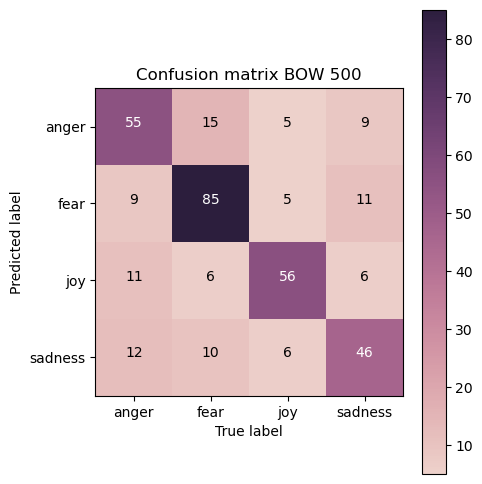

In [26]:
# plot your confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix BOW 500')

##### TFIDF 1000

In [27]:
#train_data_tfidf_features_1000 = tfidf_1000.transform(train_df['text'])
X_train_tfidf = tfidf_1000.transform(train_df['text'])
y_train_tfidf = train_df['emotion']

X_test_tfidf = tfidf_1000.transform(test_df['text'])
y_test_tfidf = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train_tfidf.shape: ', X_train_tfidf.shape)
print('y_train_tfidf.shape: ', y_train_tfidf.shape)
print('X_test_tfidf.shape: ', X_test_tfidf.shape)
print('y_test_tfidf.shape: ', y_test_tfidf.shape)

X_train_tfidf.shape:  (3613, 1000)
y_train_tfidf.shape:  (3613,)
X_test_tfidf.shape:  (347, 1000)
y_test_tfidf.shape:  (347,)


In [28]:
X_train_tfidf.shape

(3613, 1000)

In [29]:
## build DecisionTree model
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train_tfidf, y_train_tfidf)

## predict!
y_train_pred = clf_mnb.predict(X_train_tfidf)
y_test_pred = clf_mnb.predict(X_test_tfidf)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'fear', 'anger', 'fear', 'fear', 'joy', 'fear', 'joy',
       'fear', 'fear'], dtype='<U7')

In [30]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train_tfidf, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test_tfidf, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test_tfidf, y_pred=y_test_pred))

training accuracy: 0.86
testing accuracy: 0.76
              precision    recall  f1-score   support

       anger       0.85      0.71      0.77        84
        fear       0.66      0.92      0.77       110
         joy       0.86      0.75      0.80        79
     sadness       0.85      0.61      0.71        74

    accuracy                           0.76       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.76      0.76       347



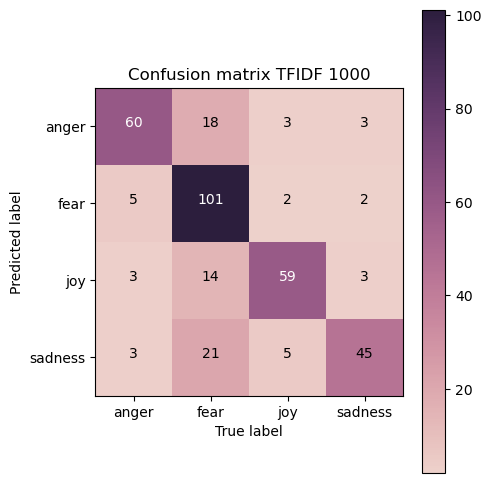

In [31]:
# plot your confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test_tfidf, y_pred=y_test_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix TFIDF 1000')

#### Exercise 5

Analysis :

The previous model utilized 500 Bag-of-Words (BOW) features with a Decision Tree classifier. In this iteration, I employed Naive Bayes for both 500 BOW features and 1000 Term Frequency-Inverse Document Frequency (TFIDF) features. The results indicate that both implementations of Naive Bayes outperform the Decision Tree, especially with 1000 TFIDF features, achieving an accuracy of 76%. A notable observation is the decreasing gap between training accuracy and testing accuracy (from 0.79 to 0.7 for BOW 5000 and 0.86 to 0.76 for TFIDF 1000), suggesting a reduction in overfitting. Additionally, when using 500 BOW features, "fear" shows the best result; however, with 1000 TFIDF features, there is a drop in precision for this emotion. So far, "joy" emotion always has high prediction accuracies compared to other emotions.

#### Exercise 6

Plot the Training and Validation Accuracy and Loss. In this part, I also did two with BOW 500 and TFIDF 1000 

##### BOW 500

In [32]:
from tensorflow import keras

In [33]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [34]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [35]:
#from keras.models import Model
#from keras.layers import Input, Dense
#from keras.layers import ReLU, Softmax

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

In [36]:
from tensorflow.keras.callbacks import CSVLogger

In [38]:
#from keras.callbacks import CSVLogger
csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 6ms/step - loss: 0.9654 - accuracy: 0.6515 - val_loss: 0.9024 - val_accuracy: 0.6830
Epoch 2/25
113/113 [==============================] - 1s 5ms/step - loss: 0.5634 - accuracy: 0.7949 - val_loss: 0.7755 - val_accuracy: 0.7089
Epoch 3/25
113/113 [==============================] - 1s 5ms/step - loss: 0.4028 - accuracy: 0.8536 - val_loss: 0.7907 - val_accuracy: 0.6859
Epoch 4/25
113/113 [==============================] - 1s 4ms/step - loss: 0.3230 - accuracy: 0.8807 - val_loss: 0.8712 - val_accuracy: 0.6888
Epoch 5/25
113/113 [==============================] - 1s 5ms/step - loss: 0.2614 - accuracy: 0.9076 - val_loss: 0.8908 - val_accuracy: 0.7003
Epoch 6/25
113/113 [==============================] - 1s 5ms/step - loss: 0.2192 - accuracy: 0.9305 - val_loss: 0.9631 - val_accuracy: 0.6974
Epoch 7/25
113/113 [==============================] - 1s 5ms/step - loss: 0.1830 - accuracy: 0.9430 - val_loss: 0.9758 - val_accuracy: 0.6974
Epoch 

In [40]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 6ms/step


array([[4.3900441e-03, 6.8674804e-09, 9.9366885e-01, 1.9410973e-03],
       [7.7209866e-01, 1.3497484e-01, 2.5688486e-02, 6.7238078e-02],
       [6.1736308e-02, 1.3093321e-01, 6.6446078e-01, 1.4286974e-01],
       [3.8929704e-07, 9.9999940e-01, 2.0585810e-07, 1.1180836e-10],
       [9.0942448e-01, 3.8366381e-04, 8.9872740e-02, 3.1908686e-04]],
      dtype=float32)

In [41]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'anger', 'joy', 'fear', 'anger'], dtype=object)

In [42]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


In [43]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log[:5]

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.651536,0.965414,0.682997,0.902376
1,1,0.794907,0.563418,0.708934,0.775525
2,2,0.853584,0.402750,0.685879,0.790703
3,3,0.880709,0.322962,0.688761,0.871181
4,4,0.907556,0.261417,0.700288,0.890782


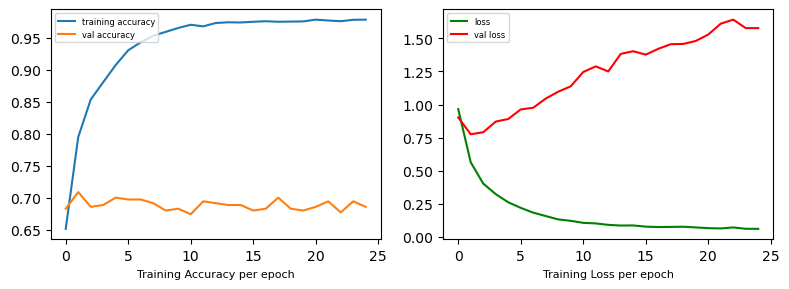

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax[0].plot(training_log.epoch.to_list(), training_log.accuracy.to_list(), label = "training accuracy", linestyle="-")
ax[0].plot(training_log.epoch.to_list(), training_log.val_accuracy.to_list(), label = "val accuracy", linestyle="-")
ax[1].plot(training_log.epoch.to_list(), training_log.loss.to_list(), label = "loss", linestyle="-", color="green")
ax[1].plot(training_log.epoch.to_list(), training_log.val_loss.to_list(), label = "val loss", linestyle="-", color="red")
ax[0].set_title("Training Accuracy per epoch", y=-0.2, fontsize="8")
ax[1].set_title("Training Loss per epoch", y=-0.2, fontsize="8")
ax[0].legend(fontsize="6", loc='upper left') 
ax[1].legend(fontsize="6", loc='upper left') 
fig.tight_layout()
fig.show()

##### TFIDF 1000

In [45]:
le = LabelEncoder()
le.fit(y_train_tfidf)

y_train_tfidf = label_encode(le, y_train_tfidf)
y_test_tfidf = label_encode(le, y_test_tfidf)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train_tfidf.shape)
print('y_test.shape: ', y_test_tfidf.shape)




## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [46]:
# I/O check
input_shape_tfidf = X_train_tfidf.shape[1]
print('input_shape: ', input_shape_tfidf)

output_shape_tfidf = len(le.classes_)
print('output_shape: ', output_shape_tfidf)

input_shape:  1000
output_shape:  4


In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_tfidf, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape_tfidf)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_3 (Dense)             (None, 64)                64064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

In [48]:
#from keras.callbacks import CSVLogger
csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train_tfidf.todense(), y_train_tfidf, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test_tfidf.todense(), y_test_tfidf))
print('training finish')

Epoch 1/25
113/113 [==============================] - 3s 10ms/step - loss: 1.3217 - accuracy: 0.3670 - val_loss: 1.2093 - val_accuracy: 0.5159
Epoch 2/25
113/113 [==============================] - 1s 6ms/step - loss: 0.7817 - accuracy: 0.7675 - val_loss: 0.6906 - val_accuracy: 0.7723
Epoch 3/25
113/113 [==============================] - 1s 6ms/step - loss: 0.3541 - accuracy: 0.8926 - val_loss: 0.6210 - val_accuracy: 0.7723
Epoch 4/25
113/113 [==============================] - 1s 6ms/step - loss: 0.2336 - accuracy: 0.9239 - val_loss: 0.6379 - val_accuracy: 0.7867
Epoch 5/25
113/113 [==============================] - 1s 6ms/step - loss: 0.1759 - accuracy: 0.9402 - val_loss: 0.6803 - val_accuracy: 0.7896
Epoch 6/25
113/113 [==============================] - 1s 6ms/step - loss: 0.1373 - accuracy: 0.9579 - val_loss: 0.7524 - val_accuracy: 0.7637
Epoch 7/25
113/113 [==============================] - 1s 6ms/step - loss: 0.1156 - accuracy: 0.9626 - val_loss: 0.7759 - val_accuracy: 0.7723
Epoch

In [49]:
training_log_tfidf = pd.DataFrame()
training_log_tfidf = pd.read_csv("logs/training_log.csv")
training_log_tfidf[:5]

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.367008,1.321719,0.515850,1.209348
1,1,0.767506,0.781700,0.772334,0.690561
2,2,0.892610,0.354050,0.772334,0.621021
3,3,0.923886,0.233574,0.786744,0.637864
4,4,0.940216,0.175934,0.789625,0.680314


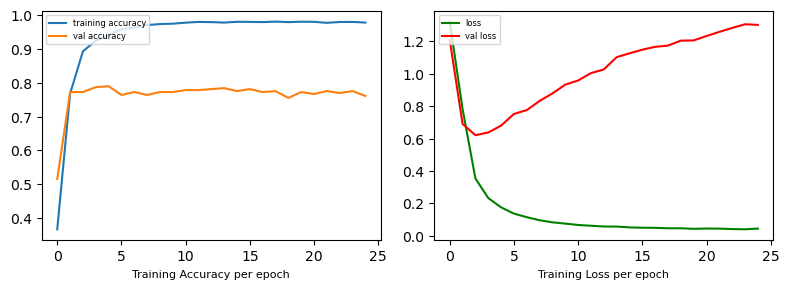

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax[0].plot(training_log_tfidf.epoch.to_list(), training_log_tfidf.accuracy.to_list(), label = "training accuracy", linestyle="-")
ax[0].plot(training_log_tfidf.epoch.to_list(), training_log_tfidf.val_accuracy.to_list(), label = "val accuracy", linestyle="-")
ax[1].plot(training_log_tfidf.epoch.to_list(), training_log_tfidf.loss.to_list(), label = "loss", linestyle="-", color="green")
ax[1].plot(training_log_tfidf.epoch.to_list(), training_log_tfidf.val_loss.to_list(), label = "val loss", linestyle="-", color="red")
ax[0].set_title("Training Accuracy per epoch", y=-0.2, fontsize="8")
ax[1].set_title("Training Loss per epoch", y=-0.2, fontsize="8")
ax[0].legend(fontsize="6", loc='upper left') 
ax[1].legend(fontsize="6", loc='upper left') 
fig.tight_layout()
fig.show()

Both attempts with BOW 500 and TFIDF 1000 showed almost similar plot which means both vectorizer and the number of features did not have much impact on the training performance.

#### Exercise 7

How can we utilize these "word" vectors to represent the sentence data and train our model?

In [51]:
## check library
import gensim
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))


['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [52]:
wv = api.load('glove-twitter-50')
type(wv)

gensim.models.keyedvectors.KeyedVectors

###### How to get vector representation of sentence in data train

In [53]:
#change data to w2v vector
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [54]:
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
test_df['text_tokenized'] = test_df['text'].apply(lambda x: nltk.word_tokenize(x))

In [55]:
train_df['vec'] = train_df['text_tokenized'].apply(sent_vec)
test_df['vec'] = test_df['text_tokenized'].apply(sent_vec)

In [56]:
train_df.head()

,id,text,emotion,intensity,text_tokenized,vec
3348,40521,@duncantrussell does Remo Williams ever actual...,sadness,0.396,"[@, duncantrussell, does, Remo, Williams, ever...","[0.15561570347670248, 0.2817692676668658, -0.0..."
402,10402,I guess #bradangelina &gt; #anger &gt; #blackl...,anger,0.500,"[I, guess, #, bradangelina, &, gt, ;, #, anger...","[0.025837500890096027, 0.022938333451747894, -..."
2462,30458,me taking a picture by myself: *awkward smile*...,joy,0.460,"[me, taking, a, picture, by, myself, :, *, awk...","[0.19338238515473646, 0.06975275663466289, 0.2..."
3181,40354,@chelseafc let them know it's the #blues,sadness,0.521,"[@, chelseafc, let, them, know, it, 's, the, #...","[0.20822636088864369, 0.0710421889300712, 0.08..."
99,10099,@politico @realDonaldTrump another angry white...,anger,0.708,"[@, politico, @, realDonaldTrump, another, ang...","[0.23512132838368416, -0.060858225656880274, 0..."


Column vec show the representation of the sentence. this vector can be used to train model.

##### training model using w2v

In [57]:
#define the label for train and test set
y_train_w2v = train_df['emotion']
y_test_w2v = test_df['emotion']

In [58]:
#define the w2v features in train and test set
X_train_w2v = train_df['vec'].to_list()
X_test_w2v = test_df['vec'].to_list()

In [59]:
#classification
from sklearn.ensemble import RandomForestClassifier

rf_model= RandomForestClassifier(n_estimators=100, random_state=1)

rf_model.fit(X_train_w2v,y_train_w2v)

y_train_pred = rf_model.predict(X_train_w2v)
y_test_pred = rf_model.predict(X_test_w2v)

acc_train = accuracy_score(y_true=y_train_w2v, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test_w2v, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train,2)))
print('testing accuracy: {}'.format(round(acc_test,2)))

print(classification_report(y_true=y_test_w2v,y_pred=y_test_pred))

training accuracy: 0.99
testing accuracy: 0.41
              precision    recall  f1-score   support

       anger       0.44      0.29      0.35        84
        fear       0.39      0.63      0.48       110
         joy       0.48      0.48      0.48        79
     sadness       0.29      0.15      0.20        74

    accuracy                           0.41       347
   macro avg       0.40      0.39      0.38       347
weighted avg       0.40      0.41      0.39       347



the model has high overfitting

#### Exercise 8

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [61]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
#toobig so the file is not in github
model_path = os.path.join(data_dir,'GoogleNews-vectors-negative300.bin.gz')
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [62]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

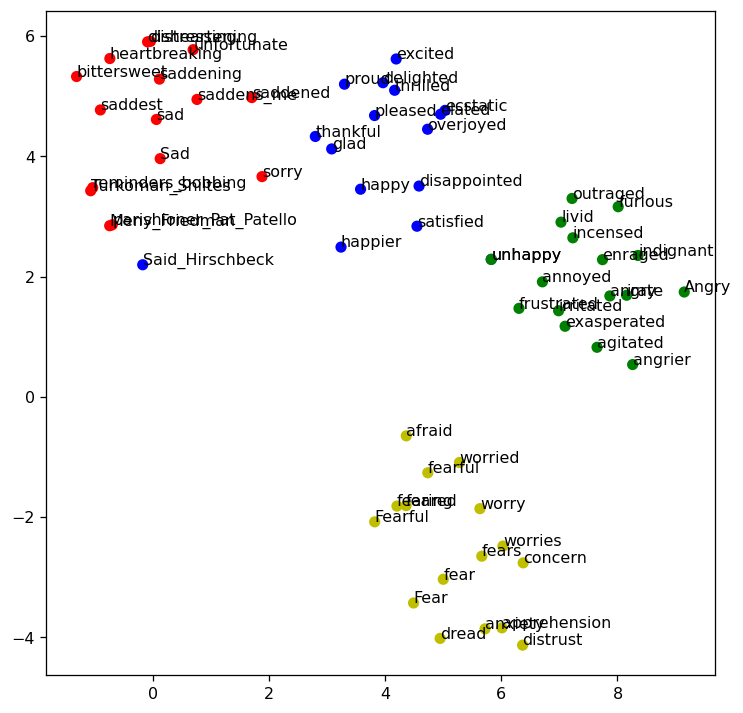

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 60
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### THIRD PART : MODELLING REPORT

#### Preparing Dataset

There are four data provided:
1. tweet_DM.json : the twitter dataset which has several columns including source that consist of tweetid, tweets, and hashtags
2. data_identification.csv : consist of tweet id and the type of data, training or testing
3. emotion.csv : consist of tweet id and the emotion
4. samplesubmission.csv : consist of tweet id and emotion as an example for submission

Since there are 4 data, I need to do some preparation in order to use the data easily. First, I load the json data. Because the data is huge, I use a library called dataset to load the data since it is faster compared to directly load to pandas. Below is the code :

In [64]:
from datasets import load_dataset

train_file = os.path.join(data_dir,'tweets_DM.json')
dataset = load_dataset("json", data_files= str(train_file))
dataset.set_format(type='pandas')
df = dataset['train'][:]
df.head()

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets


Because I only need the inside of the I used json normalization. The column names will be tweet.hashtags, tweet.tweet_id and tweet.text. For simplification, i remove the word tweet. The code is below. 

In [65]:
from pandas import json_normalize

json_data = df['_source']
new_df = json_normalize(json_data)
new_df.head()

,tweet.hashtags,tweet.tweet_id,tweet.text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [66]:
new_df.columns = new_df.columns.str.replace('tweet.', '')
new_df.head()

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


Next is differentiating training set and test set for submission. First, load the data_identification.csv, make sure the number of rows are the same with data tweets. After that, merge both data into one before splitting the data into its respective training and testing set. 

In [68]:
identification = pd.read_csv(os.path.join(data_dir, "data_identification.csv"))
identification.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [69]:
identification.shape

(1867535, 2)

In [70]:
new_df.shape

(1867535, 3)

In [71]:
data_all = pd.merge(new_df, identification, on='tweet_id')
data_all.head()

,hashtags,tweet_id,text,identification
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test


In [82]:
data_train = data_all[data_all['identification'] == 'train']
data_test = data_all[data_all['identification'] == 'test']
print(data_train.shape)
print(data_test.shape)

(1455563, 4)
(411972, 4)


Once the data are split, i need to combine training dataset with the corresponding emotion label provided in emotion.csv. For testing data, I sort them to them same order as the one in submission sample. Both data then saved to pickle for easier use.

In [75]:
emotion = pd.read_csv(os.path.join(data_dir, "emotion.csv"))
emotion.head()

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [76]:
emotion.shape

(1455563, 2)

In [77]:
data_train = pd.merge(data_train, emotion, on='tweet_id')
data_train.head()

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
3,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
4,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation


In [81]:
#Load the sample submission to sort the testing dataset
samplesub = pd.read_csv(os.path.join(data_dir,"sampleSubmission.csv"))
samplesub.set_index('id')
samplesub.shape

(411972, 2)

In [83]:
data_test.set_index('tweet_id', inplace=True)
samplesub.set_index('id', inplace=True) 

#change the order to the same order as samplesub
data_test = data_test.reindex(samplesub.index) 

In [84]:
#reset the index
data_test.reset_index(inplace=True)
samplesub.reset_index(inplace=True)
data_test.head()

,id,hashtags,text,identification
0,0x2c7743,"[loyal, real]",When your friends offer to bring you food 😭💘 #...,test
1,0x2c1eed,[],I've never let any money problems stop me.. I ...,test
2,0x2826ea,[],@KurtSchlichter Being a Hobby Historian Chelse...,test
3,0x356d9a,"[Cannabis, Marijuana, Weed, Hemp, Medicine, Le...",#Cannabis offers a natural alternative treatme...,test
4,0x20fd95,[FridayFeeling],Last Friday off before school starts. I'm read...,test


In [119]:
#save data to pickle
#import pickle
#data_train.to_pickle("data_train_emotion.pkl")
#data_test.to_pickle("data_test_emotion_order.pkl") 

#### Pre-processing

First, I checked is there any missing values from the rows of both data train and data test.

In [85]:
import helpers.data_mining_helpers as dmh

data_train.isnull().apply(lambda x: dmh.check_missing_values(x))

,hashtags,tweet_id,text,identification
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [86]:
data_test.isnull().apply(lambda x: dmh.check_missing_values(x))

,id,hashtags,text,identification
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


Since there is no missing value in both data. I continue to do other preprocessing. In the model that I used for final submission, I use transformer AutoTokenizer because I fine-tuned a roberta emotion detection model. However, before using this technique, I had employed other modelling using different type of pre-processing. 

In one attempt, I only change all user mention with '@user' or remove it completely and remove or change any link with 'http'. In another, I also remove punctuations using regex and stopwords using nltk.stopword list. At some points also did a stemming using nltk porter stemmer. 

Some of the code I use is below :
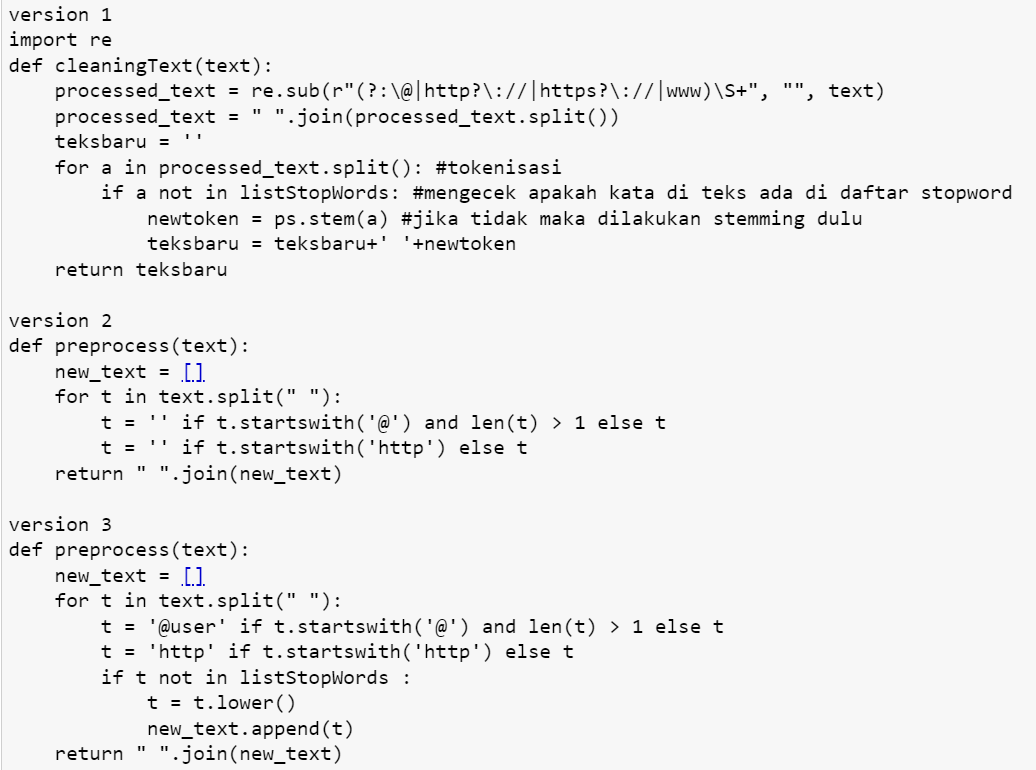
    
These pre-processing steps are randomly paired with TFIDF and word2vec to use in several classification techniques. Unfortunately, I did not keep logs on the combination and the result so I can not compare the effectiveness of each one. However, from the two roberta fine-tuning I did, the first one using version 3 preprocess but the result is lower than the last roberta submission result I did. Although this might also due to the number of layers I used in the final submission. 

In this competition, I divided the training set into training and validation set using sklearn split function, using test_size = 0.2 or test_size = 0.3. In some cases, I put the stratify condition based on emotion on the splitting function to make it balanced. At times I used the whole data then split, but if I only want to see the performance I usually sampled the data first.

example of the split :

In [ ]:
#version 1
#from sklearn.model_selection import train_test_split

#x_train, x_val = train_test_split(data_train, test_size=0.3, random_state=42, stratify=data_train.emotion)

#y_train = x_train.emotion
#y_val = x_val.emotion

In [ ]:
#version 2

#x_train, x_val, y_train, y_val = train_test_split(data_train.cleanText, 
#                        data_train.emotion , test_size=0.2, random_state=42)

#### Feature Engineering

Before using the pre-trained roberta model, I used sklearn TFIDF vectorizer with different adjustment. Sometimes, I limit the number of features ranging from 5000, 10000, 50000 and no limitation. From these, I found that the performance did not differ that much. I also have tried using bigram and trigram in some training process, although not until submission process. Bigram feature showed a bit of improvement compare to some default tfidf vectorizer. 

##### TFIDF Vectorizer

In [ ]:
#example of tfidf vectorizer

#from sklearn.feature_extraction.text import TfidfVectorizer
#import nltk

#tfidf = TfidfVectorizer(max_features = 10000, tokenizer = nltk.word_tokenize, ngram_range=(1, 3)) 

# apply analyzer to training data
#tfidf.fit(x_train['text'])
#X_train = tfidf.transform(x_train['text'])
#X_val = tfidf.transform(x_val['text'])
#X_test = tfidf.transform(data_test['text'])

##### Word2Vector

Beside TFIDF, I also tried word2vec by using glove-twitter and wiki-news pre-trained w2v model. The code is similar to the one I provided above in exercise 7. The downside of this is we need to define the length of the vector if we want to use neural network based classification because the length of each texts is different. Thus we need to do padding. In this case, I used w2v with CNN so I need to do a padding by following this source. https://github.com/lukasgarbas/nlp-text-emotion/blob/master/cnn_w2v_wiki.ipynb 

To map the w2v to my vector i used the following embedding function before using it in the embedding layer in CNN.

def create_embedding_matrix(filepath, word_index, embedding_dim):
    
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    
    with open(filepath) as f:
    
        for line in f:
        
            word, *vector = line.split()
            
            if word in word_index:
                
                idx = word_index[word]
                
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
   
    return embedding_matrix
    
 In this process, I also need to change the y emotion label from nominal to one hot encoder using tensorflow to_categorical.

##### Feature Engineering Roberta Model 

Beside using tensorflow to_categorical, I use simple encoding like the following code (not one hot encoding)

In [ ]:
# changing the data type to the category to encode into codes
#data_train['emotion'] = data_train.emotion.astype('category')
#data_train['emotion'] = data_train.emotion.cat.codes
#data_train.emotion

The above code, need to be executed before splitting into training and validation, thus when it split the label is already in encoded state. 

The feature engineering used in Roberta Model is as follow :

In [ ]:
#from transformers import AutoTokenizer, AutoModel, TFAutoModel

#MODEL = f"cardiffnlp/twitter-roberta-base-emotion-multilabel-latest"

#tokenizer = AutoTokenizer.from_pretrained(MODEL)
#roberta = TFAutoModel.from_pretrained(MODEL)

In [ ]:
# Tokenize the input (takes some time)

#x_train = tokenizer(
#    text=data_trains.text.tolist(),
#    add_special_tokens=True,
#    max_length=70,
#    truncation=True,
#    padding=True,
#    return_tensors='tf',
#    return_token_type_ids = False,
#    return_attention_mask = True,
#    verbose = True)


#x_val = tokenizer(
#    text=data_val.text.tolist(),
#    add_special_tokens=True,
#    max_length=70,
#    truncation=True,
#    padding=True,
#    return_tensors='tf',
#    return_token_type_ids = False,
#    return_attention_mask = True,
#    verbose = True)

### Modelling

#### Pre-trained Roberta Model

In this part, the results of the tokenizer were taken to embedding and then feed to CNN based Neural Network. At first I use the following architecture 

out = tf.keras.layers.GlobalMaxPool1D()(embeddings)

out = Dense(128,activation = 'relu')(out)

out = tf.keras.layers.Dropout(0.1)(out)

out = Dense(64,activation = 'relu')(out)

y = Dense(8,activation = 'softmax')(out)

later on, I modified it to become the following

In [ ]:
#max_len = 70  #max length of sentence
#import tensorflow as tf
#from tensorflow.keras.layers import Input, Dense

#input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
#input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

#embeddings = roberta(input_ids,attention_mask = input_mask)[0] #(0 is the last hidden states,1 means pooler_output)
#out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
#out = Dense(256, activation='relu')(out)
#out = tf.keras.layers.Dropout(0.1)(out)
#out = Dense(128,activation = 'relu')(out)
#out = tf.keras.layers.Dropout(0.1)(out)
#out = Dense(64,activation = 'relu')(out)

#y = Dense(8,activation = 'softmax')(out)

#model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
#model.layers[2].trainable = True

In [ ]:
#optimizer =  tf.keras.optimizers.legacy.Adam(
#    learning_rate=5e-05, 
#    epsilon=1e-08,
#    decay=0.01,
#    clipnorm=1.0)

# Set loss and metrics
#loss =CategoricalCrossentropy(from_logits = True)
#metric = CategoricalAccuracy('accuracy'),
# Compile the model
#model.compile(
#    optimizer = optimizer,
#    loss = loss,
#    metrics = metric)

In [ ]:
#model.summary()

The prediction using Roberta pretrained model from preprocessing to prediction was done in Google Colab using its GPU T4 with High Ram because my computer did not have GPU. Below is the image of the model summary.
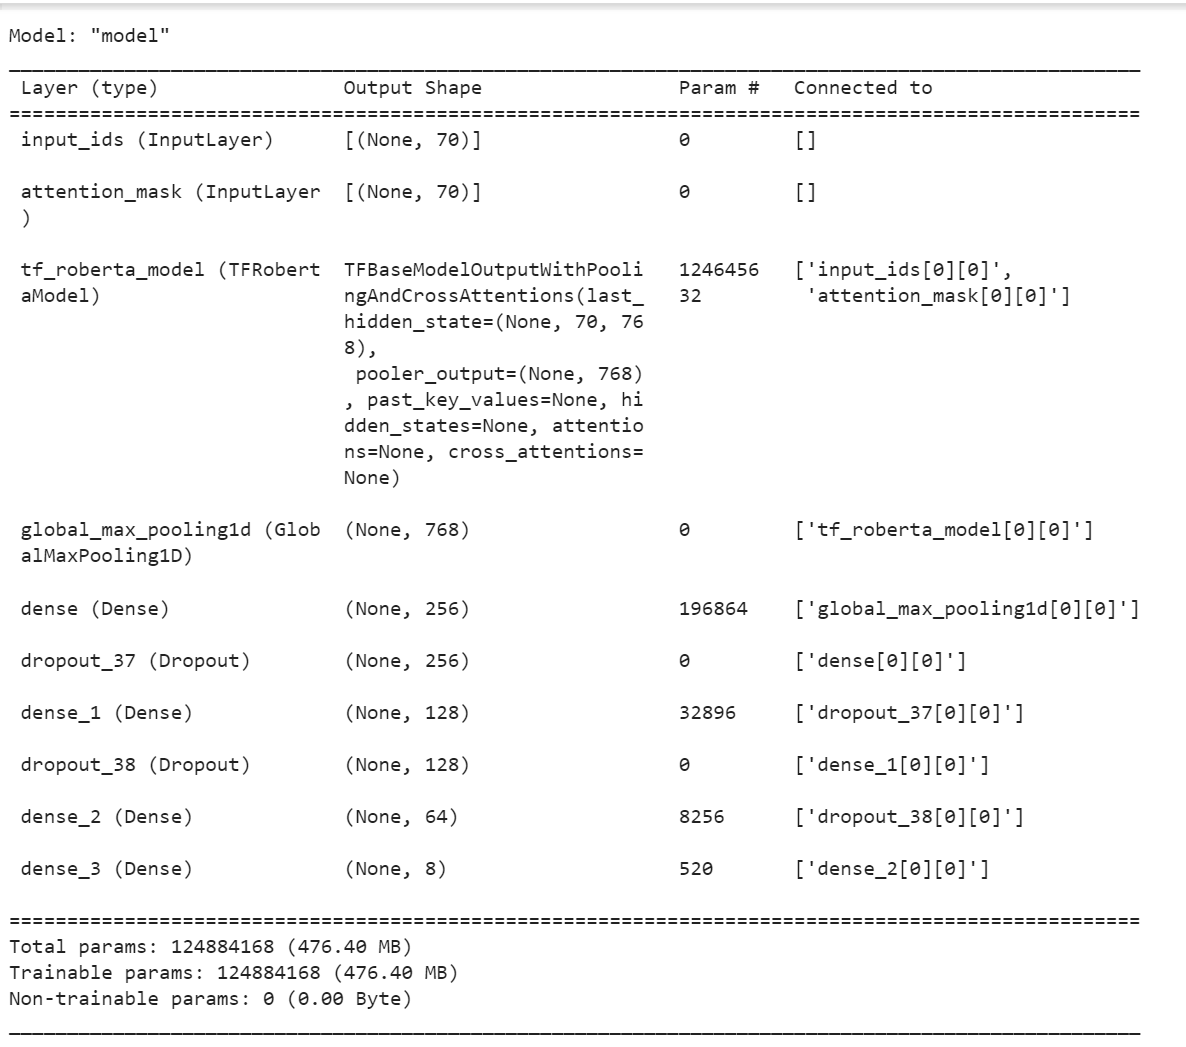

In [ ]:
#train_history = model.fit(
#    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
#    y = to_categorical(data_trains.emotion),
#    validation_data = (
#    {'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']}, to_categorical(data_val.emotion)
#    ),
#  epochs=2,
#    batch_size=32
#)

The training last for around 8 to 9 hours. The iteration was set to 2 to limit the training duration because each training iteration need around 4-5 hours to finish. In some other cases, each iteration last to 8-9 hours so I usually cancel it if I set the iteration more than 1 because the google colab account will get reset every 24hours since re-login. 
Below is the result of the above code
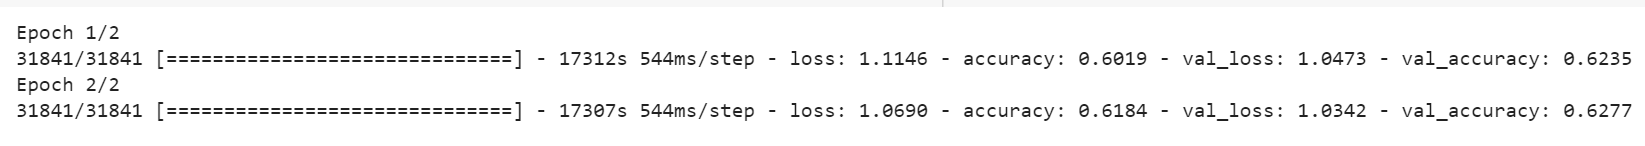

From the above result, the validation accuracy is higher than the training accuracy. However, in the prediction result, the final accuracy was around 0.51. This show that the model did not fit well. Since, this is my first time attempting to fine tune pre-trained model and use deep learning, I still can not modify the system architecture well :(

Below is the process for testing set. First, tokenize the text and predict it into the model. Because the y_train has changed into encoded 0 - 7 then I need to change it back to the emotion label by defining encoded_dict. The prediction result of CNN is in probability so we need to change it to 0 - 7 using np.argmax and then use reverse_dict to change it to emotion label. After that i saved the result into dataframe along with the tweet id and make the submission csv file.

In [ ]:
#x_test = tokenizer(
#    text=data_test.text.tolist(),
#    add_special_tokens=True,
#    max_length=70,
#    truncation=True,
#    padding='max_length',
#    return_tensors='tf',
#    return_token_type_ids = False,
#    return_attention_mask = True,
#    verbose = True)
#validation = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})*100
#validation

In [ ]:
#encoded_dict ={ 'anger':0, 'anticipation':1, 'disgust':2, 'fear':3, 'joy':4, 'sadness':5, 'surprise':6, 'trust':7}

In [ ]:
#y_predict= np.argmax(validation, axis =-1)

#reverse_dict = {v: k for k, v in encoded_dict.items()}
# Map numerical values to emotions
#predicted_emotions = [reverse_dict[val] for val in y_predict]

In [ ]:
#submission = pd.DataFrame(data_test.id)
#submission['emotion'] = predicted_emotions

In [ ]:
#submission.to_csv('/content/drive/My Drive/Colab Notebooks/lab2/submission2612adam.csv', index=False)

#### Other Modelling Attempt

As I said before, I did try other classification methods. The first one is Naive Bayes which is quite fast even with the whole data processed. The result range from 0.3x to 0.46. Another method is random forest, however it will take a long time and get stucked in the training process when the wholed data was used so I did not attempt this again. I also tried XGBoost in which using the whole text give with word2vec give 0.329 private score which then improve when i did some cleaning in the text (0.416). I also tried word2vec with CNN, as I mentioned before, I tried two attempts with 15 epoch and 50 epoch in which the results are 0.434 and 0.407 respectively. The second highest result was from roberta pre-trained model using cleaning process with 3 epoch on the initial system architecture (0.47986). Actually at the end of the competition, I want to try using lexicon features in the pre-processing, however the transformation process took really long so I did not continue it. The data have huge imbalanced. I did try to do oversampling using SMOTE but the result still around 0.44.

From this competition, I learnt a lot because I attempted other classification methods that I never tried before even though I still can not make the best result out of it. If we did not use Neural Network with enough iteration, then we need a really good preprocessing method especially in Twitter dataset where the vocabularies are a lot and to map to certain label is quite challenging. 